# Multi-armed-bandit_Task_33

https://github.com/gSchool/dsi-multi-armed-bandit/blob/master/individual.md

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
siteA=pd.read_csv("/Users/eran/Galvanize_more_repositories/dsi-multi-armed-bandit/data/siteA.txt",delimiter=',')
siteB=pd.read_csv("/Users/eran/Galvanize_more_repositories/dsi-multi-armed-bandit/data/siteB.txt",delimiter=',')

In [31]:
print(siteA.shape)
print(siteB.shape)

(799, 1)
(799, 1)


In [48]:
print("sum A =",np.sum(siteA))
print("sum B =",np.sum(siteB))
fst50A=np.sum(siteA[0:50])

sum A = 0    53
dtype: int64
sum B = 0    82
dtype: int64


We'll start by dealing with only the Site A data. We'd like to visualize our understanding of the CTR as the data streams in. Let's start with the uniform prior. So before we get any data, we will say that every probability of 0 to 1 is equally likely. We would like to plot our distribution.

To plot a continuous distribution, we need to make it discrete (since computers work that way). So we pick a large number of points to be our sample. In this case, take 100 points from 0 to 1 like this:

In [32]:
x = np.arange(0, 1.01, 0.01)

Then use the pdf function for your distribution (which scipy.stats nicely has for us). In this case, since we're looking at the uniform distribution, we do the following.

In [33]:
y = scs.uniform().pdf(x)

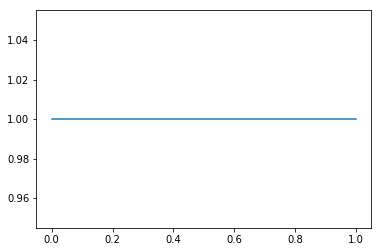

In [37]:
plt.plot(x,y)

In [44]:
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())

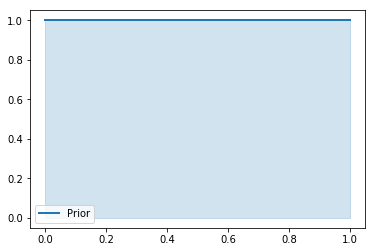

In [46]:
plot_with_fill(x, y, "Prior")
plt.legend()

In [56]:
## let's do pdf for beta distribution for the 1st 50 instances in siteA  
Apdf50 = scs.beta.pdf(x[0:101],fst50A,50-fst50A)

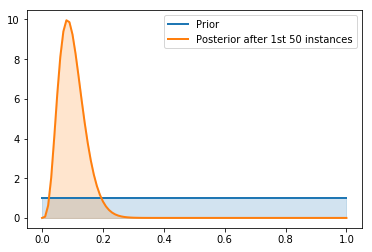

In [57]:
plot_with_fill(x, y, "Prior")
plot_with_fill(x, Apdf50, "Posterior after 1st 50 instances")
plt.legend()

In [61]:
## let's do the next posteriors: pdf for beta distribution for the 1st 100,200,400,800 instances in siteA  
Apdf100 = scs.beta.pdf(x[0:101],np.sum(siteA[0:100]),100-np.sum(siteA[0:100]))
Apdf200 = scs.beta.pdf(x[0:101],np.sum(siteA[0:200]),200-np.sum(siteA[0:200]))
Apdf400 = scs.beta.pdf(x[0:101],np.sum(siteA[0:400]),400-np.sum(siteA[0:400]))
Apdf800 = scs.beta.pdf(x[0:101],np.sum(siteA[0:800]),800-np.sum(siteA[0:800]))

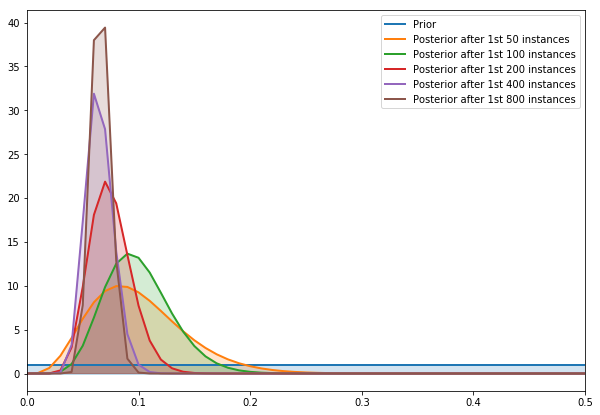

In [68]:
plt.figure(figsize=(10,7))
plt.xlim(0,0.5)
plot_with_fill(x, y, "Prior")
plot_with_fill(x, Apdf50, "Posterior after 1st 50 instances")
plot_with_fill(x, Apdf100, "Posterior after 1st 100 instances")
plot_with_fill(x, Apdf200, "Posterior after 1st 200 instances")
plot_with_fill(x, Apdf400, "Posterior after 1st 400 instances")
plot_with_fill(x, Apdf800, "Posterior after 1st 800 instances")
plt.legend()

In [70]:
Bpdf800 = scs.beta.pdf(x[0:101],np.sum(siteB[0:800]),800-np.sum(siteB[0:800]))

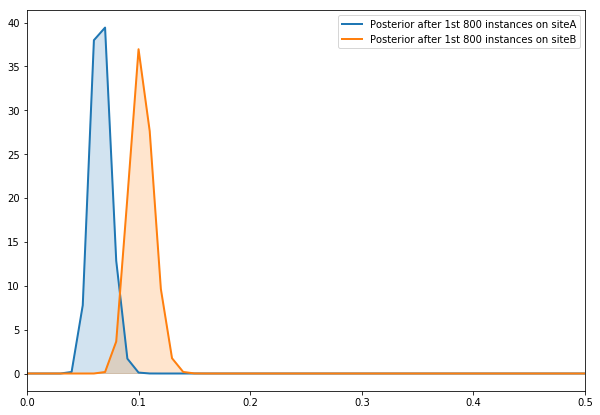

In [123]:
plt.figure(figsize=(10,7))
plt.xlim(0,0.5)
plot_with_fill(x, Apdf800, "Posterior after 1st 800 instances on siteA")
plot_with_fill(x, Bpdf800, "Posterior after 1st 800 instances on siteB")
plt.legend()

We now want to determine, given these distributions, what is the probability that site B is better than site A.

We do this with a simulation. Draw 10,000 points from site A's beta distribution and 10,000 points from site B's distribution. Use either scs.beta.rvs or np.random.beta for this. I prefer numpy's version since you can give it the number of samples in the size parameter.

You should get two arrays that look something like this:

This is simulating 10,000 times of drawing from our distributions. Count the number of times that what we drew from site B's distribution is larger than what we drew from site A's distribution. Divide by 10,000 to get the percent likelihood that site B is better than site A.

In [79]:
betaB=np.random.beta(np.sum(siteB[0:800]),800-np.sum(siteB[0:800]),size=10000)
betaA=np.random.beta(np.sum(siteA[0:800]),800-np.sum(siteA[0:800]),size=10000)

In [149]:
betaA

array([ 0.05635407,  0.0523117 ,  0.07695361, ...,  0.07291128,
        0.06372024,  0.07346137])

In [83]:
sum(betaB>betaA)/10000

0.99509999999999998

In [155]:
## same as doing this:
np.mean(betaB>betaA)

0.99509999999999998

### equal-tailed interval
### 95% interval of middle of siteB

In [130]:
ppf2pt5low=scs.beta.ppf(0.025, np.sum(siteB[0:800]),800-np.sum(siteB[0:800]))
ppf2pt5low

array([ 0.08245758])

In [132]:
ppf2pt5up=scs.beta.ppf(0.975,np.sum(siteB[0:800]),800-np.sum(siteB[0:800]))
ppf2pt5up

array([ 0.12442385])

In [136]:
interval95=np.array([ppf2pt5up,ppf2pt5low])
interval95

array([[ 0.12442385],
       [ 0.08245758]])

### equal-tailed interval
### 95% interval of middle of siteA

In [142]:
pf2pt5low=scs.beta.ppf(0.025, np.sum(siteA[0:800]),800-np.sum(siteA[0:800]))
pf2pt5low

array([ 0.05007916])

In [141]:
pf2pt5up=scs.beta.ppf(0.975,np.sum(siteA[0:800]),800-np.sum(siteA[0:800]))
pf2pt5up

array([ 0.08447285])

In [143]:
interval95A=np.array([pf2pt5up,pf2pt5low])
interval95A

array([[ 0.08447285],
       [ 0.05007916]])

### PDF as a function of ppf of mid 95% (excluding 2.5% of each tail)

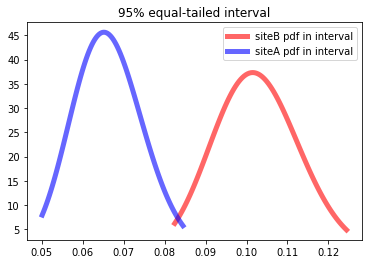

In [146]:
## xx is the x axis which is the interval of probabilities where 
xx = np.linspace(scs.beta.ppf(0.025, np.sum(siteB[0:800]), 800-np.sum(siteB[0:800])),
                scs.beta.ppf(0.975, np.sum(siteB[0:800]), 800-np.sum(siteB[0:800])), 100)
plt.plot(xx, scs.beta.pdf(xx, np.sum(siteB[0:800]), 800-np.sum(siteB[0:800])),
       'r-', lw=5, alpha=0.6, label='siteB pdf in interval')
xxx = np.linspace(scs.beta.ppf(0.025, np.sum(siteA[0:800]), 800-np.sum(siteA[0:800])),
                scs.beta.ppf(0.975, np.sum(siteA[0:800]), 800-np.sum(siteA[0:800])), 100)
plt.plot(xxx, scs.beta.pdf(xxx, np.sum(siteA[0:800]), 800-np.sum(siteA[0:800])),
       'b-', lw=5, alpha=0.6, label='siteA pdf in interval')
plt.title('95% equal-tailed interval')
plt.legend()

we can also answer the question, What is the probability that site B is 2 percentage points better than site A?

Here, instead of needing B > A, we need B > A + 0.02.

In [158]:
np.mean(betaB>betaA+0.02)

0.87960000000000005

In [173]:
print('Showcasing the meanning of distB>distA+percent% using just a small part of the distributions')
print('it is for every probabilty (sequential units on x axis),what percent of times sita-B is higher than site-A')
print('__________________________________________________________________________________________________________')
print('betaB[0:3]=',betaB[0:3])
print('betaA[0:3]=',betaA[0:3])
print('np.mean(betaB[0:3]>betaA[0:3]) = ',np.mean(betaB[0:3]>betaA[0:3]))
print('-------------------------------------')
print('betaA[0:3]+0.02 =',betaA[0:3]+0.02)
print('np.mean(betaB[0:3]>betaA[0:3]+0.02) = ',np.mean(betaB[0:3]>betaA[0:3]+0.02))

Showcasing the meanning of distB>distA+percent% using just a small part of the distributions
it is for every probabilty (sequential units on x axis),what percent of times sita-B is higher than site-A
__________________________________________________________________________________________________________
betaB[0:3]= [ 0.09520102  0.08908209  0.09191556]
betaA[0:3]= [ 0.05635407  0.0523117   0.07695361]
np.mean(betaB[0:3]>betaA[0:3]) =  1.0
-------------------------------------
betaA[0:3]+0.02 = [ 0.07635407  0.0723117   0.09695361]
np.mean(betaB[0:3]>betaA[0:3]+0.02) =  0.666666666667


Note, when you compare B > A you can calculate a single probability that this occurs in the simulation, but you can also do something richer, like calculate the entire distribution of B - A. Plot a histogram of this quantity. Try B-A-.02. What distribution do the shape of these histograms suggest? Why? What shape does it take on if you only use one observation of site_b's data? Is this a problem?

(array([    4.,    16.,    41.,    98.,   226.,   408.,   645.,   995.,
         1279.,  1424.,  1365.,  1212.,   944.,   666.,   377.,   173.,
           76.,    37.,    12.,     2.]),
 array([-0.01358654, -0.0085567 , -0.00352686,  0.00150298,  0.00653282,
         0.01156266,  0.0165925 ,  0.02162234,  0.02665218,  0.03168202,
         0.03671186,  0.0417417 ,  0.04677154,  0.05180137,  0.05683121,
         0.06186105,  0.06689089,  0.07192073,  0.07695057,  0.08198041,
         0.08701025]),
 <a list of 20 Patch objects>)

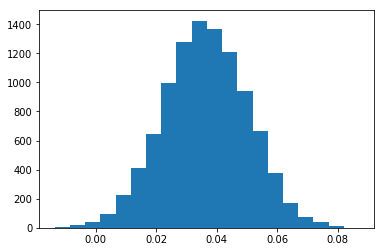

In [179]:
plt.hist(betaB-betaA,bins=20)
# this means that the most frequent "gap" (precentage) which betaB>betaA is ~0.04

(array([    4.,    16.,    41.,    98.,   226.,   408.,   645.,   995.,
         1279.,  1424.,  1365.,  1212.,   944.,   666.,   377.,   173.,
           76.,    37.,    12.,     2.]),
 array([-0.03358654, -0.0285567 , -0.02352686, -0.01849702, -0.01346718,
        -0.00843734, -0.0034075 ,  0.00162234,  0.00665218,  0.01168202,
         0.01671186,  0.0217417 ,  0.02677154,  0.03180137,  0.03683121,
         0.04186105,  0.04689089,  0.05192073,  0.05695057,  0.06198041,
         0.06701025]),
 <a list of 20 Patch objects>)

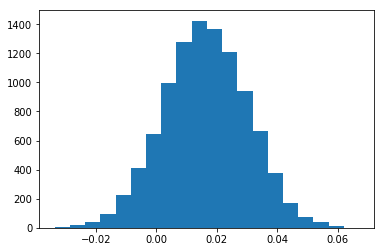

In [181]:
plt.hist(betaB-betaA-0.02,bins=20)
# this means that the most frequent "gap" (precentage) which betaB is higher than betaA+0.02% is ~0.02

Using frequentist approach (classical stats as opposed to bayesian) We now want to determine what is the probability that site B is better than site A.

From:

https://www.coursera.org/learn/biostatistics-2/lecture/eIL8m/two-sample-binomial-tests-comparing-2-binomial-proportions

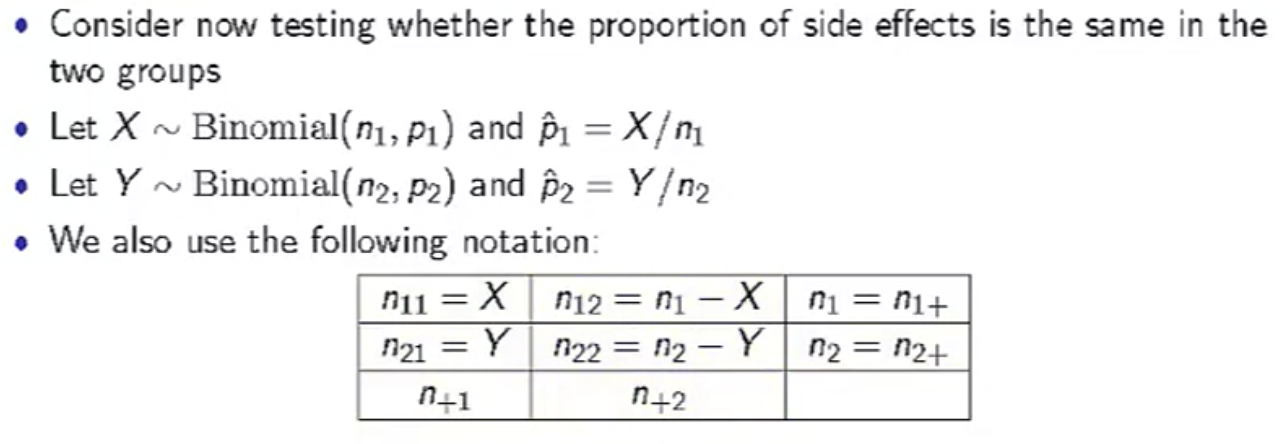

In [189]:
xA=np.sum(siteA) ## success in site A
nA=len(siteA)  ## total in site A
xB=np.sum(siteB) ## ..B
nB=len(siteB) ## ..B

In [190]:
pA=xA/nA ## pA is p^ 1 for our purposes
pB=xB/nB ## nA is n1 for our purposes

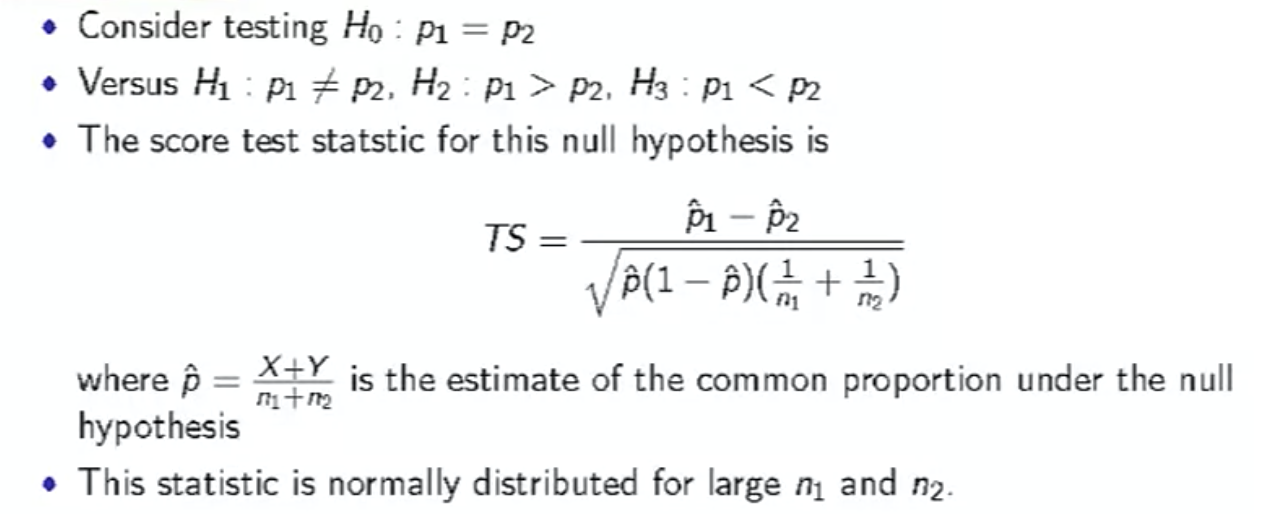

In [195]:
## from the above formula:
pHat=(xA+xB)/(nA+nB) ## this is "the estimate of the common proportion under H0"
TS=(pB-pA)/(np.sqrt(pHat*(1-pHat)*(1/nA+1/nB)))
TS

0    2.608539
dtype: float64

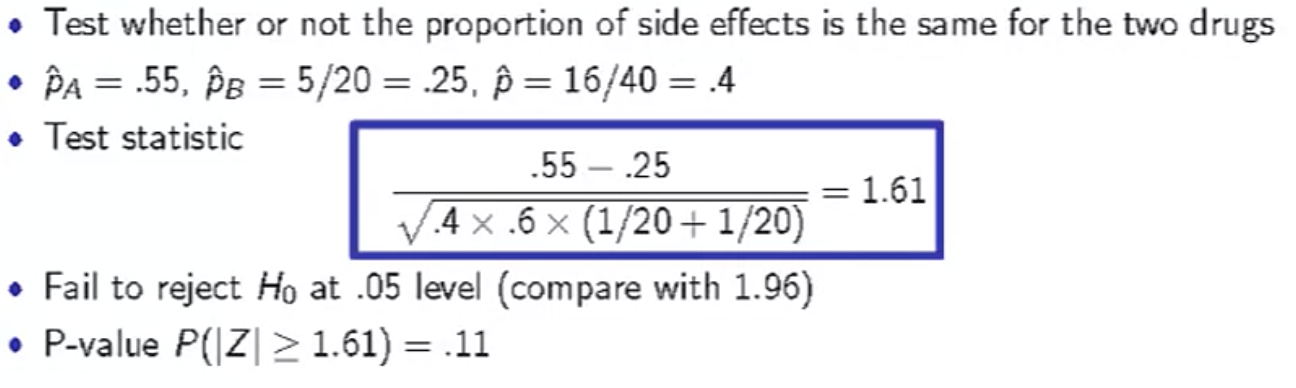

In [198]:
## by looking it the example, we can assume normal distribution for our statistic so we can use Z test
p_value = scs.norm.sf(abs(TS)) #one tail

why to use 1 tail:
    https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

In [209]:
print("p-value that p(success siteB) is higher than p(success siteA) is significant:")
print('p-value: P(Z<0.005)= 0.00455*')

p-value that p(success siteB) is higher than p(success siteA) is significant:
p-value: P(Z<0.005)= 0.00455*


the average click on site A yields 1.00 dollars in profit

the average click on site B yields 1.05 dollars in profit

Should your company invest in switching to site B? Assume it is costly to do so, both in time and money.

In [220]:
profB=0.05 ## how more profitable is B over A in percent
## if 800 entrances a month:
profB=xB*1.05
profA=xA*1
prof=profB-profA
print("added profitability for using site B over site A (considering 800 entrances a month):")
print(prof[0],"$")

added profitability for using site B over site A (considering 800 entrances a month):
33.1 $


In [298]:
## Let's assume that 
## let's assume 1% growth in site visits
profit_difference=prof[0] ## profit at 1st month if using site B
print(profit_difference)
xA=np.sum(siteA) ## success in site A
nA=len(siteA)  ## total in site A
xB=np.sum(siteB) ## ..B
nB=len(siteB) ## ..B
gr=1.01
sumDeltaClicks=nB*pB-nA*pA
profit_difference=prof[0]
float(profit_difference)

33.1


33.10000000000001

In [299]:
months=1
while profit_difference<=1000:
    months=months+1
    nB=gr*nB
    nA=gr*nA
    deltaclick=nB*pB-nA*pA
    sumDeltaClicks=sumDeltaClicks+deltaclick
    dolDelta=sumDeltaClicks*1.05
    profit_difference=dolDelta[0]
    float(profit_difference)
print('# months to break even =',months)
print('Comulative profit after',months,'months for using site B is - $',float(profit_difference))

# months to break even = 29
Comulative profit after 29 months for using site B is - $ 1018.5643041472254


### conclusion: 
### if changing to site B over site A would cost a one time payment of 1000 dollars for a web-devolper service (including implementation), then the break-even for that investment would be in: 29 months considering 1% of increase in web entrances per month. the profit then would be 18.6 dollars 
#### (1018.6 profit from using site B-1000 cost of transitionning to site B)